In [ ]:
!pip install pypdf2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [ ]:
import pandas as pd
from sklearn.utils import resample


In [ ]:
# Define the category with the maximum number of samples
max_samples = df['Category'].value_counts().max()

# Initialize an empty DataFrame for the balanced dataset
balanced_df = pd.DataFrame(columns=df.columns)

# Loop through each category and resample to match the maximum number of samples
for category, group in df.groupby('Category'):
    if len(group) < max_samples:
        resampled_group = resample(group, n_samples=max_samples, random_state=42, replace=True)
        balanced_df = pd.concat([balanced_df, resampled_group])

# Reset the index of the balanced DataFrame
balanced_df.reset_index(drop=True, inplace=True)


In [ ]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your dataset (assumes you have a DataFrame 'df' with 'Resume' and 'Category' columns)
# Replace this with your dataset loading code
# df = pd.read_csv("YourDataset.csv")

# Assuming you've already preprocessed your data as mentioned in your original code

# Separate features (X) and target labels (y)
x = df['Resume']
y = df['Category']

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

ValueError: ignored

In [ ]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])
le = LabelEncoder()
le.fit(df['Category'])
df['Category_encoded'] = le.transform(df['Category'])
combined_df = pd.DataFrame({
    'Vectorized_Resume': requiredText,
    'Category_encoded': df['Category_encoded']
})
print(combined_df.head())


                                   Vectorized_Resume  Category_encoded
0    (0, 7337)\t0.07793683691598892\n  (0, 7325)\...                 6
1    (0, 7325)\t0.20642184894390578\n  (0, 7272)\...                 6
2    (0, 7325)\t0.24885214475584758\n  (0, 7302)\...                 6
3    (0, 7325)\t0.05902863934210892\n  (0, 7268)\...                 6
4    (0, 7334)\t0.272651642219511\n  (0, 7325)\t0...                 6


In [ ]:
dense_array = requiredText.toarray()
vectorized_data_first_five_rows = dense_array[:5]
print(vectorized_data_first_five_rows)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
missing_values = combined_df.isnull().sum()
print(missing_values)


Vectorized_Resume    0
Category_encoded     0
dtype: int64


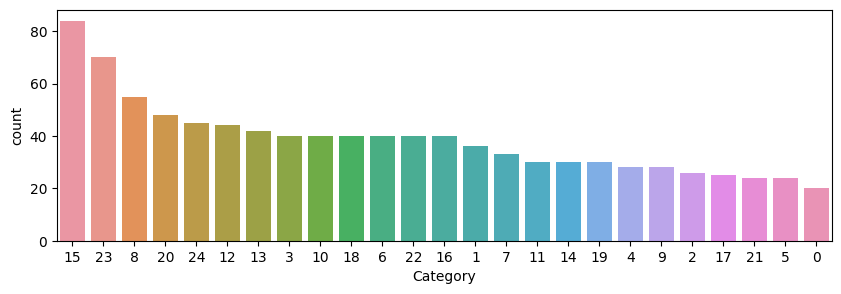

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
plt.show()

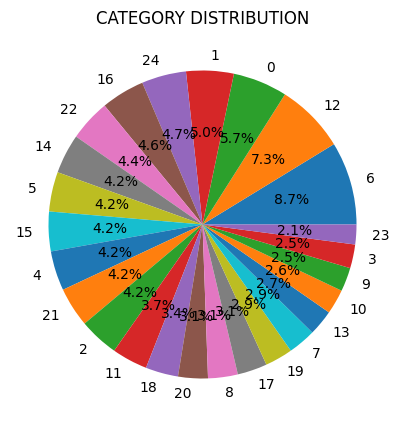

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts =df['Category'].value_counts()
targetLabels =df['Category'].unique()
plt.figure(1, figsize=(11,11))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%')
plt.show()

<ipython-input-24-cd162ad01573>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length']).set_title('Resume length distribution')


Text(0.5, 1.0, 'Resume length distribution')

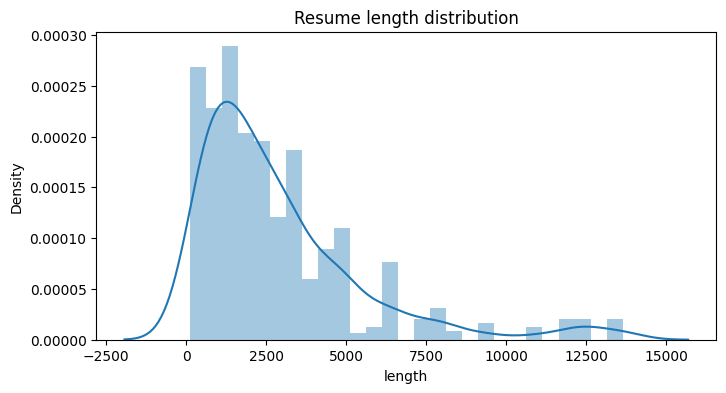

In [ ]:
df['length'] = df['Resume'].str.len()
#df['length'].describe()
plt.figure(figsize=(8,4 ))
sns.distplot(df['length']).set_title('Resume length distribution')

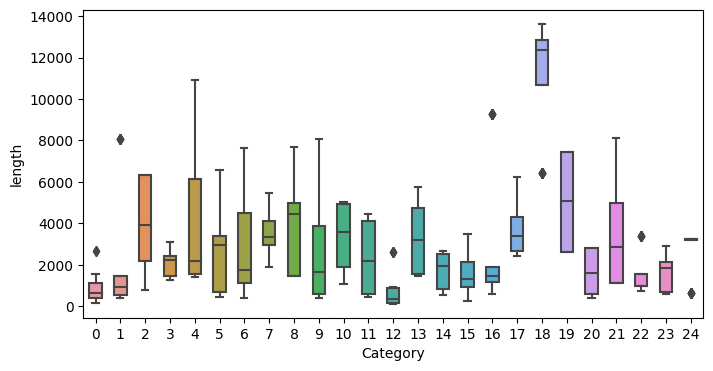

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Category', y='length', width=.5);